<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Credit_Card_Customer_Churn_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit card institutions use customer churning to predict who is going to stop using their credit card services. This churn metrics helps institutions improve customer retention. This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc.

link of dataset: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [48]:
# delete non important coulmns
data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [49]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# Geography,Gender has categorical value so convert into numeric with using get_dummies
data=pd.get_dummies(data,['Geography','Gender'],drop_first=True)

In [51]:
# so new data in numeric form look like
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [52]:
data.ndim

2

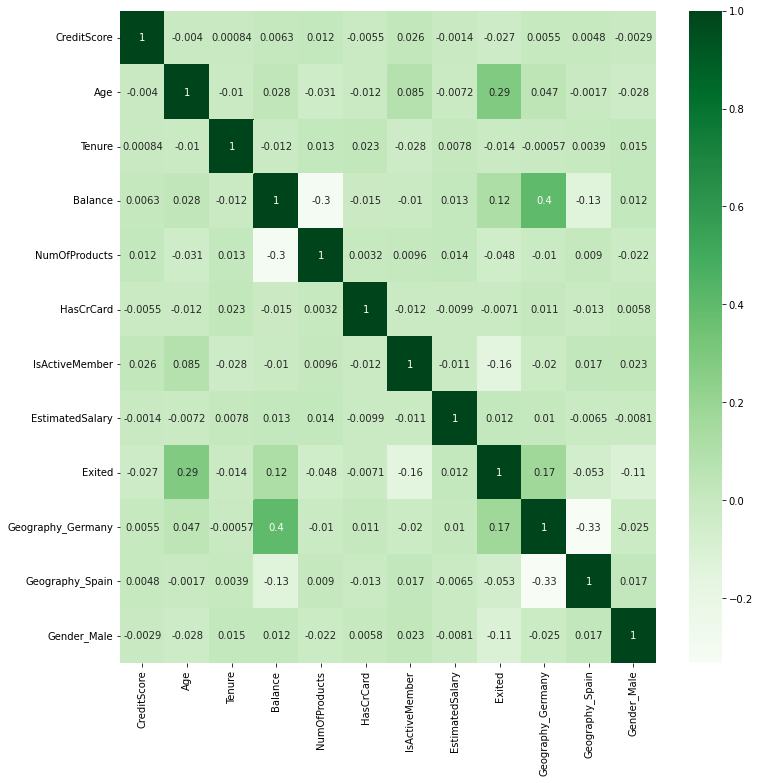

In [84]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [53]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [57]:
# so lets start to apply machine learning algo. for prediction
x=data.drop('Exited',axis=1)
y=data.Exited

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
# some value are so large so convert into a small range numbers or say transform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[[1543   64]
 [ 314   79]]
Precision: 0.5524475524475524
recall: 0.2010178117048346
f1_score: 0.2947761194029851
                 Actual Value   Predicted Value
Actual Value          1.000000         0.248584
Predicted Value       0.248584         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


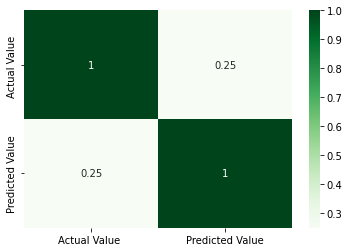

In [86]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model0=LogisticRegression()
model0.fit(x_train,y_train)
pred_y0=model0.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y0))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y0))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y0))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y0))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y0})
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))

[[1548   59]
 [ 205  188]]
Precision: 0.7611336032388664
recall: 0.47837150127226463
f1_score: 0.5875
                 Actual Value   Predicted Value
Actual Value          1.000000         0.533396
Predicted Value       0.533396         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


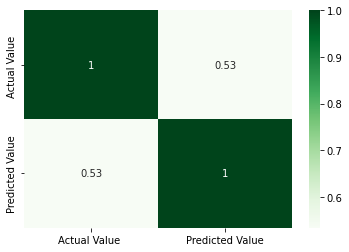

In [87]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred_y1=model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y1))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y1))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y1))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y1))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y1})
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))

[[1362  245]
 [ 193  200]]
Precision: 0.449438202247191
recall: 0.5089058524173028
f1_score: 0.47732696897374705
                 Actual Value   Predicted Value
Actual Value           1.00000          0.34053
Predicted Value        0.34053          1.00000
AxesSubplot(0.125,0.125;0.62x0.755)


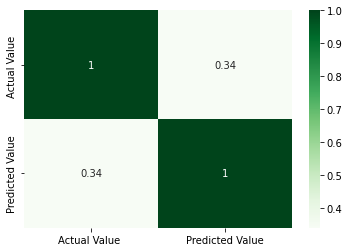

In [88]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y2))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y2))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y2))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y2))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y2})
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))

[[1526   81]
 [ 252  141]]
Precision: 0.6351351351351351
recall: 0.35877862595419846
f1_score: 0.45853658536585357
                 Actual Value   Predicted Value
Actual Value          1.000000         0.390068
Predicted Value       0.390068         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


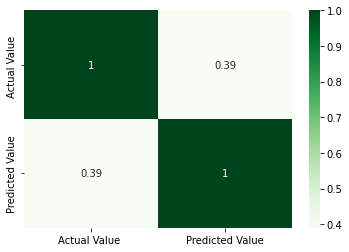

In [89]:
#gausiian naive bias classifier
model3 = GaussianNB()
model3.fit(x_train,y_train)
pred_y3=model3.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y3))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y3))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y3))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y3))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y3})
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))

[[1521   86]
 [ 289  104]]
Precision: 0.5473684210526316
recall: 0.26463104325699743
f1_score: 0.35677530017152653
                 Actual Value   Predicted Value
Actual Value          1.000000         0.286093
Predicted Value       0.286093         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


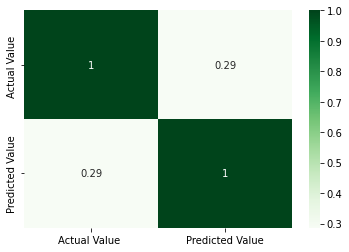

In [90]:
"""we can't use multinomial classifier because if X_min < 0:
raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)
"""
#BernoulliNB naive bias classifier
model5 = BernoulliNB()
model5.fit(x_train,y_train)
pred_y5=model5.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y5))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y5))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y5))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y5))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y5})
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))